In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, svm, metrics
import numpy as np

# Set the plotting style
style.use('seaborn')

# Load the Resistivity data from a CSV file
resistivity_data = pd.read_csv('ResistivityLOGforall4model.csv')

# Select relevant columns for modeling
selected_columns = ['Electric Field', 'Aging Temp', 'Testing Temp', 'Aging Days', 'Resistivity']
resistivity_data_subset = resistivity_data[selected_columns]

# Separate features (X) and target variable (y)
X = resistivity_data_subset.iloc[:, :-1].values
y = resistivity_data_subset.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)


In [42]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(81, 4) (36, 4) (81,) (36,)


In [43]:
# Decision Tree Regression Model
# Importing the regressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Create and train the Neural Network Regressor
neural_network_regressor = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)


In [44]:
# the coefficeint of determination
print("the Training r-sq is: %.2f "% neural_network_regressor.score(X_train,y_train))

the Training r-sq is: -2.92 


In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score, r2_score

In [46]:
# Predictions on the training dataset
y_train_pred = neural_network_regressor.predict(X_train)

# Calculate and print the Mean Absolute Error (MAE)
print('The MAE is: %.2f' % mean_absolute_error(y_train, y_train_pred))

# Calculate and print the Mean Squared Error (MSE)
print('The MSE is: %.2f' % mean_squared_error(y_train, y_train_pred))

# Calculate and print the Root Mean Squared Error (RMSE)
print("The RMSE is: %.2f" % np.sqrt(mean_squared_error(y_train, y_train_pred)))

# Calculate and print the Explained Variance Score (EVS)
print("The EVS is: %.2f" % explained_variance_score(y_train, y_train_pred))


The MAE is: 3.53
The MSE is: 18.55
The RMSE is: 4.31
The EVS is: -2.91


In [47]:
# Predictions on the testing data
y_test_pred = neural_network_regressor.predict(X_test)

# Testing Coefficient of Determination (R-squared)
print('The testing R-squared is: %.2f' % r2_score(y_test, y_test_pred))
# Alternatively
print('The testing R-squared is: %.2f' % neural_network_regressor.score(X_test, y_test))

# Metrics
# Mean Absolute Error (MAE)
print('The MAE is: %.2f' % mean_absolute_error(y_test, y_test_pred))

# Mean Squared Error (MSE)
print('The MSE is: %.2f' % mean_squared_error(y_test, y_test_pred))

# Root Mean Squared Error (RMSE)
print("The RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Explained Variance Score (EVS)
print('The EVS is: %.2f' % explained_variance_score(y_test, y_test_pred))


The testing R-squared is: -3.50
The testing R-squared is: -3.50
The MAE is: 3.16
The MSE is: 15.74
The RMSE: 3.97
The EVS is: -3.33


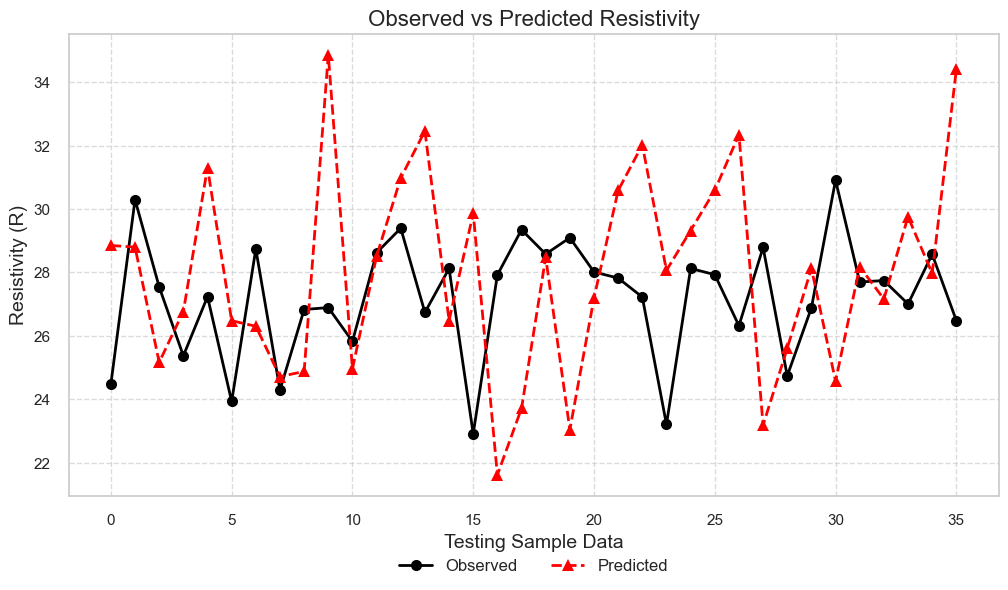

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Generate x-axis values
x_ax = range(len(X_test))

# Plotting the observed and predicted data with enhanced aesthetics
plt.plot(x_ax, y_test, label='Observed', color='black', linestyle='-', linewidth=2, marker='o', markersize=8)
plt.plot(x_ax, y_test_pred, label='Predicted', color='red', linestyle='--', linewidth=2, marker='^', markersize=8)

# Set plot labels and title
plt.ylabel('Resistivity (R)', fontsize=14)
plt.xlabel('Testing Sample Data', fontsize=14)
plt.title('Observed vs Predicted Resistivity', fontsize=16)

# Add legend with proper formatting
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower center', ncol=2, frameon=False, fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()


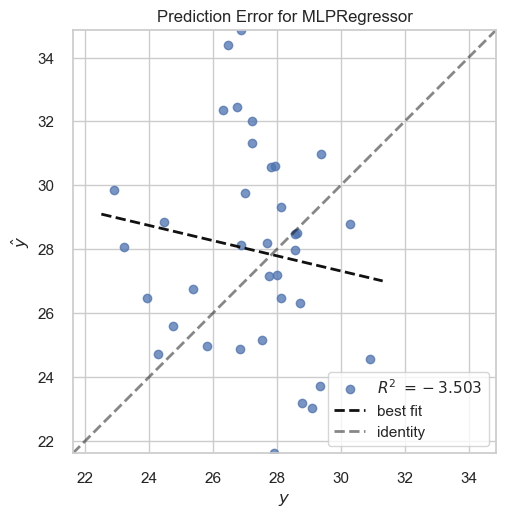

<AxesSubplot:title={'center':'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [49]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import PredictionError

# Initialize the PredictionError visualizer
visualizer = PredictionError(neural_network_regressor)

# Fit the visualizer on the training data
visualizer.fit(X_train, y_train)

# Score the visualizer on the testing data
visualizer.score(X_test, y_test)

# Display the plot
visualizer.poof()


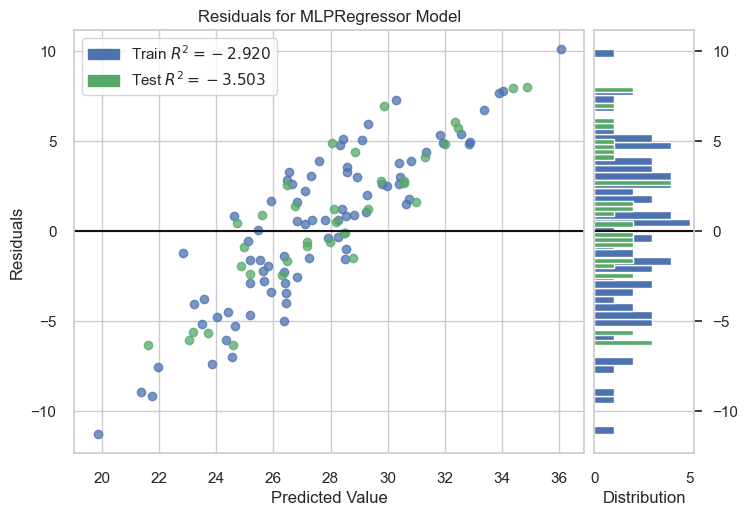

<AxesSubplot:title={'center':'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [50]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot

# Initialize the ResidualsPlot visualizer
visualizer = ResidualsPlot(neural_network_regressor)

# Fit the visualizer on the training data
visualizer.fit(X_train, y_train)

# Score the visualizer on the testing data
visualizer.score(X_test, y_test)

# Display the plot
visualizer.poof()


In [51]:
# The k-fold CV
from sklearn.model_selection import cross_val_score
# Traning model CV
score_train=cross_val_score(neural_network_regressor, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [52]:
score_train

array([-41.5183253 , -14.0609876 , -17.6744579 , -20.34035424,
        -8.02820106, -30.62698564, -23.5186505 , -15.54219221,
       -13.00744672, -10.33071351])

In [53]:
# the  absolute Mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

19.464831470260847


In [54]:
# The tesing model CV
score_test =cross_val_score(neural_network_regressor, X_test,y_test,scoring = 'neg_mean_squared_error', cv=10)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

In [55]:
score_test

array([ -6.25219393, -19.22079283, -11.05375766,  -7.59270657,
       -34.54164304,  -3.87426105,  -9.34912941,  -7.33091059,
       -24.84039762, -11.04355532])

In [56]:
print(absolute(np.mean(score_test)))

13.509934802463482


In [57]:
import pandas as pd
from sklearn.pipeline import Pipeline

In [58]:
from sklearn import metrics
predictions = neural_network_regressor.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model  Performance')
print('Accuracy = {:0.4f}%.'.format(accuracy))
print('Mean Absolute Error = {:0.4f}'.format(np.mean(errors)))
print("R2 score = {:0.4f}".format(r2_score(y_test, predictions)))
print("mean_squared_error = {:0.4f}".format(mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error = %.4f' % np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Model  Performance
Accuracy = 88.2784%.
Mean Absolute Error = 3.1567
R2 score = -3.5034
mean_squared_error = 15.7407
Root Mean Squared Error = 3.9674


In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

# Initialize and train the MLP Regressor (model4)
model4 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

# Generate predictions on the testing dataset
predictions_model4 = model4.predict(X_test)


In [60]:
errors = abs(predictions_model4 - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model 4 Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))
from sklearn.metrics import r2_score,mean_squared_error
print("R2 score = {:0.3f}%.".format(r2_score(y_test, predictions_model4)))
print("mean_squared_error = {:0.10f}%.".format(mean_squared_error(y_test, predictions_model4)))

Model 4 Performance
Average Error: 3.1567 degrees.
Accuracy = 88.28%.
R2 score = -3.503%.
mean_squared_error = 15.7406584460%.
